<a href="https://colab.research.google.com/github/ahassanzadeh/CarPricePrediction/blob/main/3_Cox_Training%2C_Cross_validation%2C_Testing_and_the_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os 
os.chdir('/content/drive/MyDrive/Job Interview /Companies/Cox')

In [3]:
# General Libraries and a unsupervised learning library  
from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
from pandas import DataFrame as df 
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
# Filtering warnings 
import warnings
warnings.filterwarnings("ignore")
# import Plotly for high quality visulization:
# !pip install chart_studio  
# !pip install plotly==4.8.2
# import chart_studio.plotly as py
# import plotly.graph_objects as go

In [5]:
# import supervised learning libraries for regression 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [6]:
data = pd.read_csv('proccessed_data.csv')

In [7]:
data = data.drop(['Unnamed: 0','SOLD DATE'] , axis=1)
data.head()

,SOLD PRICE,ODOMETER (KM),CONDITION GRADE,MSRP,WEIGHT,AllWheel,FrontWheel,Petrol,Diesel,Country,ENGINE SIZE,In-Line,V-Shape,Turbo,Supercharger,regular,Premium,Cylinders,Sedan,SUV,CarSize,Economic,Mid-rang,Luxury,Model,Brand,Version,State,Year,Month,Day
0,26400,3970,1.0,38490.0,1805,1.0,0.0,0.0,1.0,3.0,2.2,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,12.0,0.0,71.0,4.0,2018,5,29
1,39100,2213,1.0,52490.0,2220,1.0,0.0,0.0,1.0,9.0,2.8,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,19.0,0.0,125.0,4.0,2018,6,29
2,39100,1874,1.0,52490.0,2220,1.0,0.0,0.0,1.0,9.0,2.8,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,19.0,0.0,125.0,4.0,2018,6,29
3,27100,6942,1.0,38490.0,1805,1.0,0.0,0.0,1.0,3.0,2.2,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,12.0,0.0,71.0,4.0,2018,6,29
4,25000,2220,1.0,39990.0,1630,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,1.0,3.0,0.0,1.0,0.0,14.0,0.0,80.0,4.0,2018,7,12


# Training and Cross Validation 

In [8]:
X, y = data.drop('SOLD PRICE', axis = 1), data['SOLD PRICE']

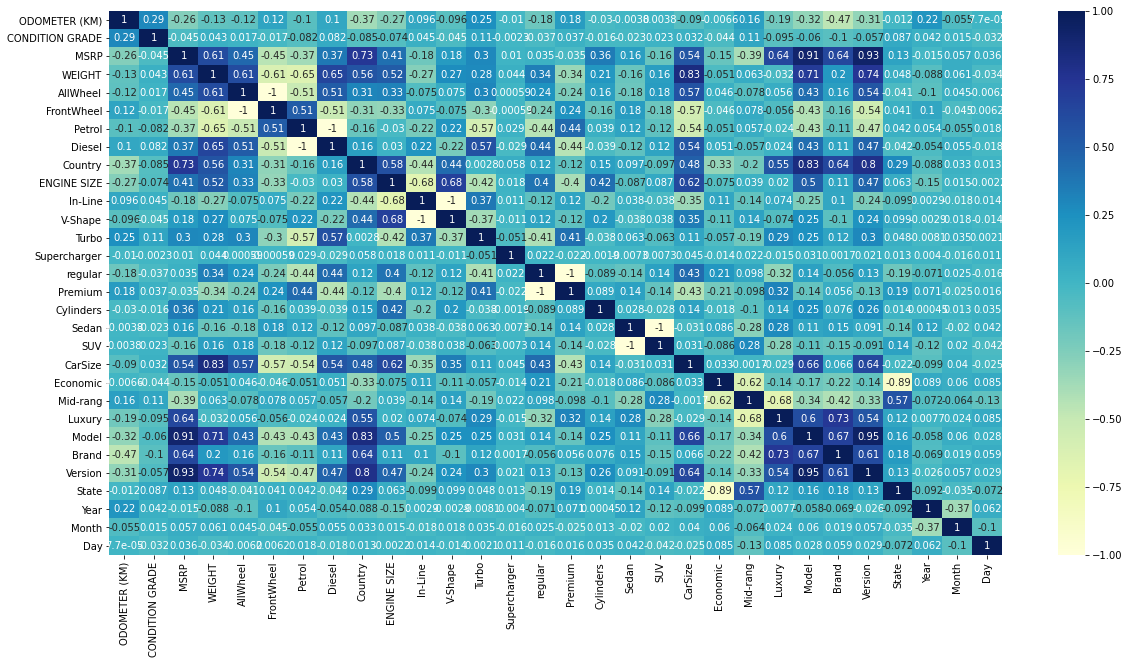

In [9]:
# find correlation of training data 
plt.figure(figsize = (20, 10))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

The heat meap indicate that some variables such as Model, Version, MSRP are correlated. how ever it is fairly uncorelated data. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [11]:
# info of features and ground-truth 
print(X.info())
y = y.to_frame()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11122 entries, 0 to 11121
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ODOMETER (KM)    11122 non-null  int64  
 1   CONDITION GRADE  11097 non-null  float64
 2   MSRP             11122 non-null  float64
 3   WEIGHT           11122 non-null  int64  
 4   AllWheel         11122 non-null  float64
 5   FrontWheel       11122 non-null  float64
 6   Petrol           11122 non-null  float64
 7   Diesel           11122 non-null  float64
 8   Country          11122 non-null  float64
 9   ENGINE SIZE      11122 non-null  float64
 10  In-Line          11122 non-null  float64
 11  V-Shape          11122 non-null  float64
 12  Turbo            11122 non-null  float64
 13  Supercharger     11122 non-null  float64
 14  regular          11122 non-null  float64
 15  Premium          11122 non-null  float64
 16  Cylinders        11122 non-null  float64
 17  Sedan       

In [12]:
model = []
model.append(("XGB",xgb.XGBRegressor()))

I used r2 score for measuring how good the model predict:
The coefficient r2 is defined as (1 - u/v).
- u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and 
- v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
- The best r2 result is 1.

In [13]:
for name,model in model:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "r2")
    print(name, cv_result)

[19:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB [0.77604662 0.69060142]


# Evaluation Model 

In [14]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)

print('Mean Squared Error of XGB regressor on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Mean Squared Error of XGB regressor on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

[19:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error of XGB regressor on training set: 0.85
Mean Squared Error of XGB regressor on test set: 0.96


Text(0, 0.5, 'y_pred')

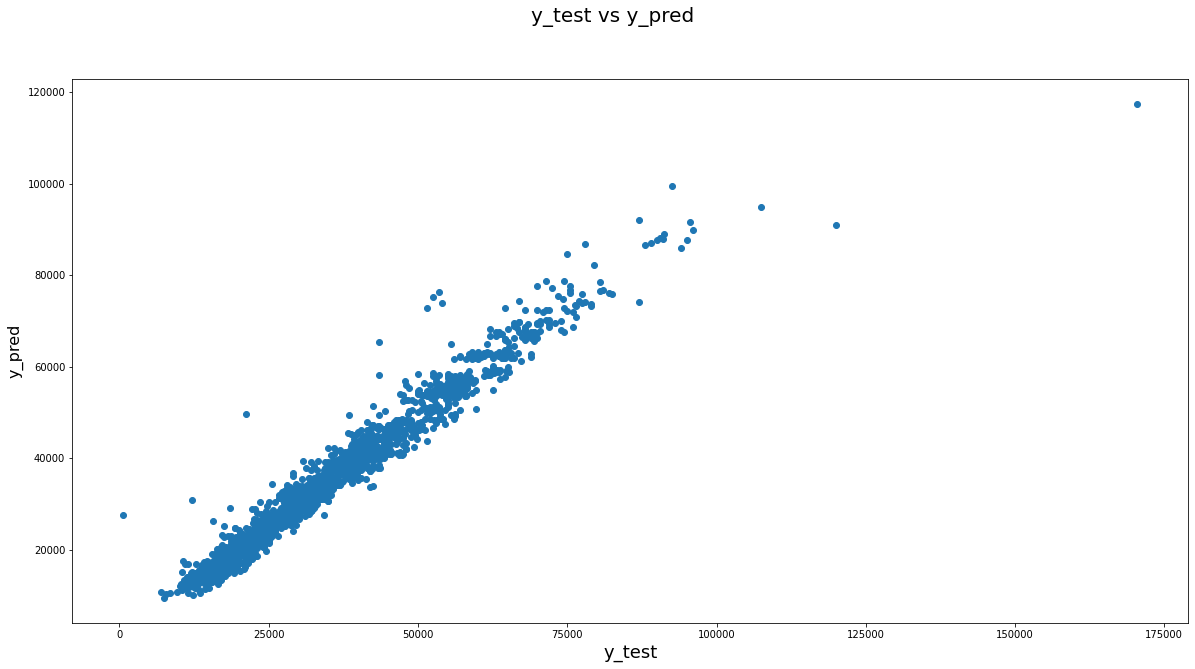

In [15]:
y_pred = xgb_model.predict(X_test)
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

# Result

What is the estimated price for the following two vehicles in Excellent condition in Sept 2021?
- **2019 BMW 3 series 2.0 320D Sport Steptronic**
  - Model year = 2019 
  - BRAND NAME = BMW
  - Model Name = 3 series
  - Engine Size = 2.0
  - VERSION NAME = 320D Sport Steptronic 
- **2018 Holden Trax 1.4 Turbo LTZ Auto**
  - Model year = 2018
  - BRAND NAME = HOLDEN
  - Model Name = Trax
  - Engine Size = 1.4
  - Turbo = True 
  - VERSION NAME = 320D Sport Steptronic 


In [16]:
# 2019 BMW 3 series 2.0 320D Sport Steptronic
BMW_data = data.loc[9372]
BMW_data

SOLD PRICE         50000.0
ODOMETER (KM)       5030.0
CONDITION GRADE        1.0
MSRP               69954.0
WEIGHT              1450.0
AllWheel               0.0
FrontWheel             1.0
Petrol                 0.0
Diesel                 1.0
Country               10.0
ENGINE SIZE            2.0
In-Line                1.0
V-Shape                0.0
Turbo                  1.0
Supercharger           0.0
regular                1.0
Premium                0.0
Cylinders              4.0
Sedan                  1.0
SUV                    0.0
CarSize                3.0
Economic               0.0
Mid-rang               0.0
Luxury                 1.0
Model                 30.0
Brand                  5.0
Version              171.0
State                  4.0
Year                2020.0
Month                  9.0
Day                   24.0
Name: 9372, dtype: float64

In [17]:
# 2018 Holden Trax 1.4 Turbo LTZ Auto
Holden_data = data.loc[3305]
Holden_data

SOLD PRICE         13600.0
ODOMETER (KM)      69659.0
CONDITION GRADE        1.0
MSRP               30490.0
WEIGHT              1437.0
AllWheel               0.0
FrontWheel             1.0
Petrol                 1.0
Diesel                 0.0
Country                3.0
ENGINE SIZE            1.4
In-Line                1.0
V-Shape                0.0
Turbo                  1.0
Supercharger           0.0
regular                0.0
Premium                1.0
Cylinders              4.0
Sedan                  0.0
SUV                    1.0
CarSize                2.0
Economic               0.0
Mid-rang               1.0
Luxury                 0.0
Model                  5.0
Brand                  0.0
Version               32.0
State                  4.0
Year                2019.0
Month                  8.0
Day                   29.0
Name: 3305, dtype: float64

In [18]:
# Make these two instance ready for predictaion 

# 2019 BMW 3 series 2.0 320D Sport Steptronic 
x_bmw = X.loc[9372]
#Changes to the original data 
x_bmw['Year'] = '2021'
df_bmw = x_bmw.to_frame()
df_bmw.reset_index(drop=True, inplace=True)
df_bmw =df_bmw.transpose()
df_bmw.columns = ['ODOMETER (KM)', 'CONDITION GRADE', 'MSRP', 'WEIGHT', 'AllWheel',
       'FrontWheel', 'Petrol', 'Diesel', 'Country', 'ENGINE SIZE', 'In-Line',
       'V-Shape', 'Turbo', 'Supercharger', 'regular', 'Premium', 'Cylinders',
       'Sedan', 'SUV', 'CarSize', 'Economic', 'Mid-rang', 'Luxury', 'Model',
       'Brand', 'Version', 'State', 'Year', 'Month', 'Day']


# 2018 Holden Trax 1.4 Turbo LTZ Auto
x_holden = X.loc[3305]
#Changes to the original data 
x_holden['Year'] = '2021'
x_holden['Month'] = '9'
df_holden = x_holden.to_frame()
df_holden.reset_index(drop=True, inplace=True)
df_holden =df_holden.transpose()
df_holden.columns = ['ODOMETER (KM)', 'CONDITION GRADE', 'MSRP', 'WEIGHT', 'AllWheel',
       'FrontWheel', 'Petrol', 'Diesel', 'Country', 'ENGINE SIZE', 'In-Line',
       'V-Shape', 'Turbo', 'Supercharger', 'regular', 'Premium', 'Cylinders',
       'Sedan', 'SUV', 'CarSize', 'Economic', 'Mid-rang', 'Luxury', 'Model',
       'Brand', 'Version', 'State', 'Year', 'Month', 'Day']

In [19]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)

y_bmw = xgb_model.predict(df_bmw)
print(" Prediction sale Price for 2019 BMW 3 series 2.0 320D Sport Steptronic with Excellent Condition on September 2021 is", int(y_bmw))

y_holden = xgb_model.predict(df_holden)
print(" Prediction sale Price for 2018 Holden Trax 1.4 Turbo LTZ Auto with Excellent Condition on September 2021 is", int(y_holden))

[19:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Prediction sale Price for 2019 BMW 3 series 2.0 320D Sport Steptronic with Excellent Condition on September 2021 is 59991
 Prediction sale Price for 2018 Holden Trax 1.4 Turbo LTZ Auto with Excellent Condition on September 2021 is 17682


In [20]:
print("The resale price of BMW 3 series 2.0 320D Sport Steptronic with Excellent Condition on September 2020 was", y.loc[9372]['SOLD PRICE'])
print("This model price increase will increase", int(((int(y_bmw) - y.loc[9372]['SOLD PRICE'])/int(y_bmw))*100), "percent in September 2021 compared to resale value one year ago" )
print("The resale price of 2018 Holden Trax 1.4 Turbo LTZ Auto with Excellent Condition on August 2019 was", y.loc[3305]['SOLD PRICE'])
print("This model price will increase", int((int(y_holden) - y.loc[3305])/int(y_holden)*100), "percent in September 2021 compared to resale value two years ago" )

The resale price of BMW 3 series 2.0 320D Sport Steptronic with Excellent Condition on September 2020 was 50000
This model price increase will increase 16 percent in September 2021 compared to resale value one year ago
The resale price of 2018 Holden Trax 1.4 Turbo LTZ Auto with Excellent Condition on August 2019 was 13600
This model price will increase 23 percent in September 2021 compared to resale value two years ago
